In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform, skew, kurtosis
from sklearn.metrics import r2_score
import statsmodels.api as sm
import os
from arch.univariate import ConstantMean, GARCH, Normal
from arch.__future__ import reindexing
from arch.univariate import arch_model
from arch import arch_model
from arch.univariate import GARCH
from arch.__future__ import reindexing
import yfinance as yf

In [2]:
stocks = ['MSFT', 'CAT', 'IBM', 'MMM', 'MRK']
start_date = '1990-01-01'
data = yf.download(stocks, start=start_date)['Adj Close']
daily_returns = data.pct_change()

[*********************100%***********************]  5 of 5 completed


In [3]:
daily_returns = daily_returns.dropna()

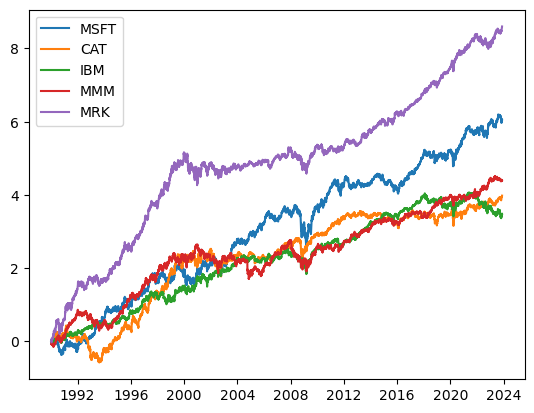

In [4]:
plt.plot(daily_returns.cumsum())
plt.legend(stocks)

# Garch Parameters Computations

individual garch models

In [5]:
from arch import arch_model
print(daily_returns.columns)

msft_garch = arch_model(daily_returns['MSFT'], p=1, q=1)
results_garch_msft = msft_garch.fit()
print(results_garch_msft.summary())

Index(['CAT', 'IBM', 'MMM', 'MRK', 'MSFT'], dtype='object')
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0729579886628857e+21
Iteration:      2,   Func. Count:     19,   Neg. LLF: 11748509248340.373
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4.005821444387683e+23
Iteration:      4,   Func. Count:     48,   Neg. LLF: -22226.638581170675
Optimization terminated successfully    (Exit mode 0)
            Current function value: -22226.63855073604
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   MSFT   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                22226.6
Distribution:                  Normal   AIC:                          -44445.3
Method:            Maximum Likelihood

C:\Users\urkes\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004008. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [6]:
cat_garch = arch_model(daily_returns['CAT'], p=1, q=1)
results_garch_cat = cat_garch.fit()
print(results_garch_cat.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5963522247.028931
Iteration:      2,   Func. Count:     18,   Neg. LLF: -21829.028950705193
Optimization terminated successfully    (Exit mode 0)
            Current function value: -21829.02895641195
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    CAT   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                21829.0
Distribution:                  Normal   AIC:                          -43650.1
Method:            Maximum Likelihood   BIC:                          -43621.9
                                        No. Observations:                 8535
Date:                Thu, Nov 16 2023   Df Residuals:                     8534
Time:         

C:\Users\urkes\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004048. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [7]:
ibm_garch = arch_model(daily_returns['IBM'], p=1, q=1)
results_garch_ibm = ibm_garch.fit()
print(results_garch_ibm.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2500952152.6808534
Iteration:      2,   Func. Count:     18,   Neg. LLF: -23512.32506496542
Optimization terminated successfully    (Exit mode 0)
            Current function value: -23512.325106853146
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    IBM   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                23512.3
Distribution:                  Normal   AIC:                          -47016.7
Method:            Maximum Likelihood   BIC:                          -46988.4
                                        No. Observations:                 8535
Date:                Thu, Nov 16 2023   Df Residuals:                     8534
Time:        

C:\Users\urkes\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002963. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [8]:
mmm_garch = arch_model(daily_returns['MMM'], p=1, q=1)
results_garch_mmm = mmm_garch.fit()
print(results_garch_mmm.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.4249255457778526e+21
Iteration:      2,   Func. Count:     19,   Neg. LLF: 101044443537737.72
Iteration:      3,   Func. Count:     30,   Neg. LLF: 4907713000880.265
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4988497.991059381
Iteration:      5,   Func. Count:     57,   Neg. LLF: -24558.332800246364
Optimization terminated successfully    (Exit mode 0)
            Current function value: -24558.33280466017
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    MMM   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                24558.3
Distribution:                  Normal   AIC:                          -49108.7
Method:            Maximum Li

C:\Users\urkes\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002183. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [9]:
mrk_garch = arch_model(daily_returns['MRK'], p=1, q=1)
results_garch_mrk = mrk_garch.fit()
print(results_garch_mrk.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 283982020171.13367
Iteration:      2,   Func. Count:     19,   Neg. LLF: -7043.221748700208
Iteration:      3,   Func. Count:     27,   Neg. LLF: 72958100391.99857
Iteration:      4,   Func. Count:     39,   Neg. LLF: -23349.458350070232
Optimization terminated successfully    (Exit mode 0)
            Current function value: -23349.458346550753
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    MRK   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                23349.5
Distribution:                  Normal   AIC:                          -46690.9
Method:            Maximum Likelihood   BIC:                          -46662.7
                         

C:\Users\urkes\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000277. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [10]:
from IPython.display import display, Math

#

# The DCC-GARCH Process

From Alielli (2006):

$$
Q_t = \Omega + \alpha \bar{Q}_{t-1}^{-\frac{1}{2}} \varepsilon_{t-1} \varepsilon_{t-1}' \bar{Q}_{t-1}^{-\frac{1}{2}} + \beta Q_{t-1}
$$

and continue to use

$$
R_t = \bar{Q}_t^{-\frac{1}{2}} Q_t \bar{Q}_t^{-\frac{1}{2}}
$$

Where: 
- $ Q_t $ is the conditional covariance matrix at time $ t $
- $ \Omega $ is the long-run average covariance matrix
- $ \alpha $ and $ \beta $ are parameters to be estimated from the data
- $ \varepsilon_{t-1} $ is the vector of residuals (or shocks) at time $ t-1 $
- $ \varepsilon_{t-1}' $ is the transpose of the vector of residuals at time $ t-1 $, which means flipping the row vector into a column vector (or vice versa)
- $ Q_{t-1} $ is the conditional covariance matrix at time $ t-1 $
- $ \bar{Q}_{t-1}^{-\frac{1}{2}} $ is the diagonal matrix of the conditional variances (the square root of the diagonal elements of $ Q_{t-1} $)
- $ R_t $ is the conditional correlation matrix at time $ t $


#

Step 1: Maximize $L_v$ 

In [11]:
# Estimate GARCH Indiviual Garch Parameters and timeseries conditional variances
msft_params = results_garch_msft.params
msft_conditional_variances = results_garch_msft.conditional_volatility ** 2
cat_params = results_garch_cat.params
cat_conditional_variances = results_garch_cat.conditional_volatility ** 2
ibm_params = results_garch_ibm.params
ibm_conditional_variances = results_garch_ibm.conditional_volatility ** 2
ibm_params = results_garch_ibm.params
ibm_conditional_variances = results_garch_ibm.conditional_volatility ** 2
mmm_params = results_garch_mmm.params
mmm_conditional_variances = results_garch_mmm.conditional_volatility ** 2
mrk_params = results_garch_mrk.params
mrk_conditional_variances = results_garch_mrk.conditional_volatility ** 2

# Calculate Residuals for the second step of the process.
cat_standardized_residuals = results_garch_cat.resid / results_garch_cat.conditional_volatility
ibm_standardized_residuals = results_garch_ibm.resid / results_garch_ibm.conditional_volatility
mmm_standardized_residuals = results_garch_mmm.resid / results_garch_mmm.conditional_volatility
mrk_standardized_residuals = results_garch_mrk.resid / results_garch_mrk.conditional_volatility
msft_standardized_residuals = results_garch_msft.resid / results_garch_msft.conditional_volatility

In [31]:
results_garch_ibm.conditional_volatility

Date
1990-01-03    0.011297
1990-01-04    0.011319
1990-01-05    0.011443
1990-01-08    0.011321
1990-01-09    0.011258
                ...   
2023-11-10    0.013598
2023-11-13    0.013799
2023-11-14    0.013611
2023-11-15    0.013767
2023-11-16    0.013850
Name: cond_vol, Length: 8535, dtype: float64

In [13]:
standardized_residuals_df = pd.concat([cat_standardized_residuals, ibm_standardized_residuals, mmm_standardized_residuals, mrk_standardized_residuals, msft_standardized_residuals], axis=1)
standardized_residuals_df.columns = ['CAT', 'IBM', 'MMM', 'MRK', 'MSFT']

#

Step 2: Maximize $L_c$

In [14]:
alpha_cat = results_garch_cat.params[2]
alpha_ibm = results_garch_ibm.params[2]
alpha_mmm = results_garch_mmm.params[2]
alpha_mkr = results_garch_mrk.params[2]
alpha_msft = results_garch_msft.params[2]
beta_cat = results_garch_cat.params[3]
beta_ibm = results_garch_ibm.params[3]
beta_mmm = results_garch_mmm.params[3]
beta_mkr = results_garch_mrk.params[3]
beta_msft = results_garch_msft.params[3]

In [15]:
#Calculate sample variance
sample_variance_matrix = standardized_residuals_df.cov()

#find omega with variance targeting
alpha_mean = np.mean([alpha_msft, alpha_cat, alpha_ibm, alpha_mmm, alpha_mkr])
beta_mean = np.mean([beta_msft, beta_cat, beta_ibm, beta_mmm, beta_mkr])
Omega = (1 - alpha_mean - beta_mean) * sample_variance_matrix
alpha = alpha_mean
beta = beta_mean

#initialize q_1
tenth_p = len(standardized_residuals_df) // 10
Q_hat_1 = np.mean([standardized_residuals_df.iloc[i].values[:, None] @standardized_residuals_df.iloc[i].values[:, None].T for i in range(tenth_p)], axis=0)

#iteratively update Qt
Q_hat_t = np.zeros((len(standardized_residuals_df), len(standardized_residuals_df.columns), len(standardized_residuals_df.columns)))
Q_hat_t[0] = Q_hat_1 # first qhat in series

for t in range(1, len(standardized_residuals_df)):
    eps_t_minus_1 = standardized_residuals_df.iloc[t-1].values[:, None]
    outer_product = eps_t_minus_1 @ eps_t_minus_1.T
    Q_t_minus_1_invroot = np.linalg.inv(np.sqrt(np.diag(np.diag(Q_hat_t[t-1]))))
    Q_hat_t[t] = Omega + alpha * (Q_t_minus_1_invroot @ outer_product @ Q_t_minus_1_invroot) + beta * Q_hat_t[t-1]

#Obtain Rt
R_hat_t = np.zeros_like(Q_hat_t)
for t in range(len(standardized_residuals_df)):
    Q_t_invroot = np.linalg.inv(np.sqrt(np.diag(np.diag(Q_hat_t[t]))))    
    R_hat_t[t] = Q_t_invroot @ Q_hat_t[t] @ Q_t_invroot

In [34]:
Q_hat_1

array([[0.98902085, 0.21238695, 0.27594221, 0.18280332, 0.25546797],
       [0.21238695, 0.96127412, 0.28451072, 0.27310439, 0.29428211],
       [0.27594221, 0.28451072, 0.8443744 , 0.30143247, 0.2588837 ],
       [0.18280332, 0.27310439, 0.30143247, 0.94576514, 0.35562124],
       [0.25546797, 0.29428211, 0.2588837 , 0.35562124, 1.136622  ]])

In [33]:
Q_hat_t

array([[[ 9.89020849e-01,  2.12386953e-01,  2.75942210e-01,
          1.82803317e-01,  2.55467969e-01],
        [ 2.12386953e-01,  9.61274120e-01,  2.84510720e-01,
          2.73104393e-01,  2.94282107e-01],
        [ 2.75942210e-01,  2.84510720e-01,  8.44374400e-01,
          3.01432474e-01,  2.58883696e-01],
        [ 1.82803317e-01,  2.73104393e-01,  3.01432474e-01,
          9.45765141e-01,  3.55621241e-01],
        [ 2.55467969e-01,  2.94282107e-01,  2.58883696e-01,
          3.55621241e-01,  1.13662200e+00]],

       [[ 9.72987500e-01,  2.47905104e-01,  3.10980661e-01,
          2.32670262e-01,  2.50996605e-01],
        [ 2.47905104e-01,  9.34044797e-01,  3.08724743e-01,
          3.06262726e-01,  2.86787145e-01],
        [ 3.10980661e-01,  3.08724743e-01,  8.34726026e-01,
          3.35059647e-01,  2.53000123e-01],
        [ 2.32670262e-01,  3.06262726e-01,  3.35059647e-01,
          9.52205473e-01,  3.40414894e-01],
        [ 2.50996605e-01,  2.86787145e-01,  2.53000123e-01,
  

#

# Vizualizations

In [16]:
num_assets = 5
correlation_time_series = {}

for i in range(num_assets):
    for j in range(i+1, num_assets):
        asset_i = standardized_residuals_df.columns[i]
        asset_j = standardized_residuals_df.columns[j]
        correlations = [R_hat_t[t][i, j] for t in range(len(standardized_residuals_df))]
        correlation_time_series[(asset_i, asset_j)] = correlations

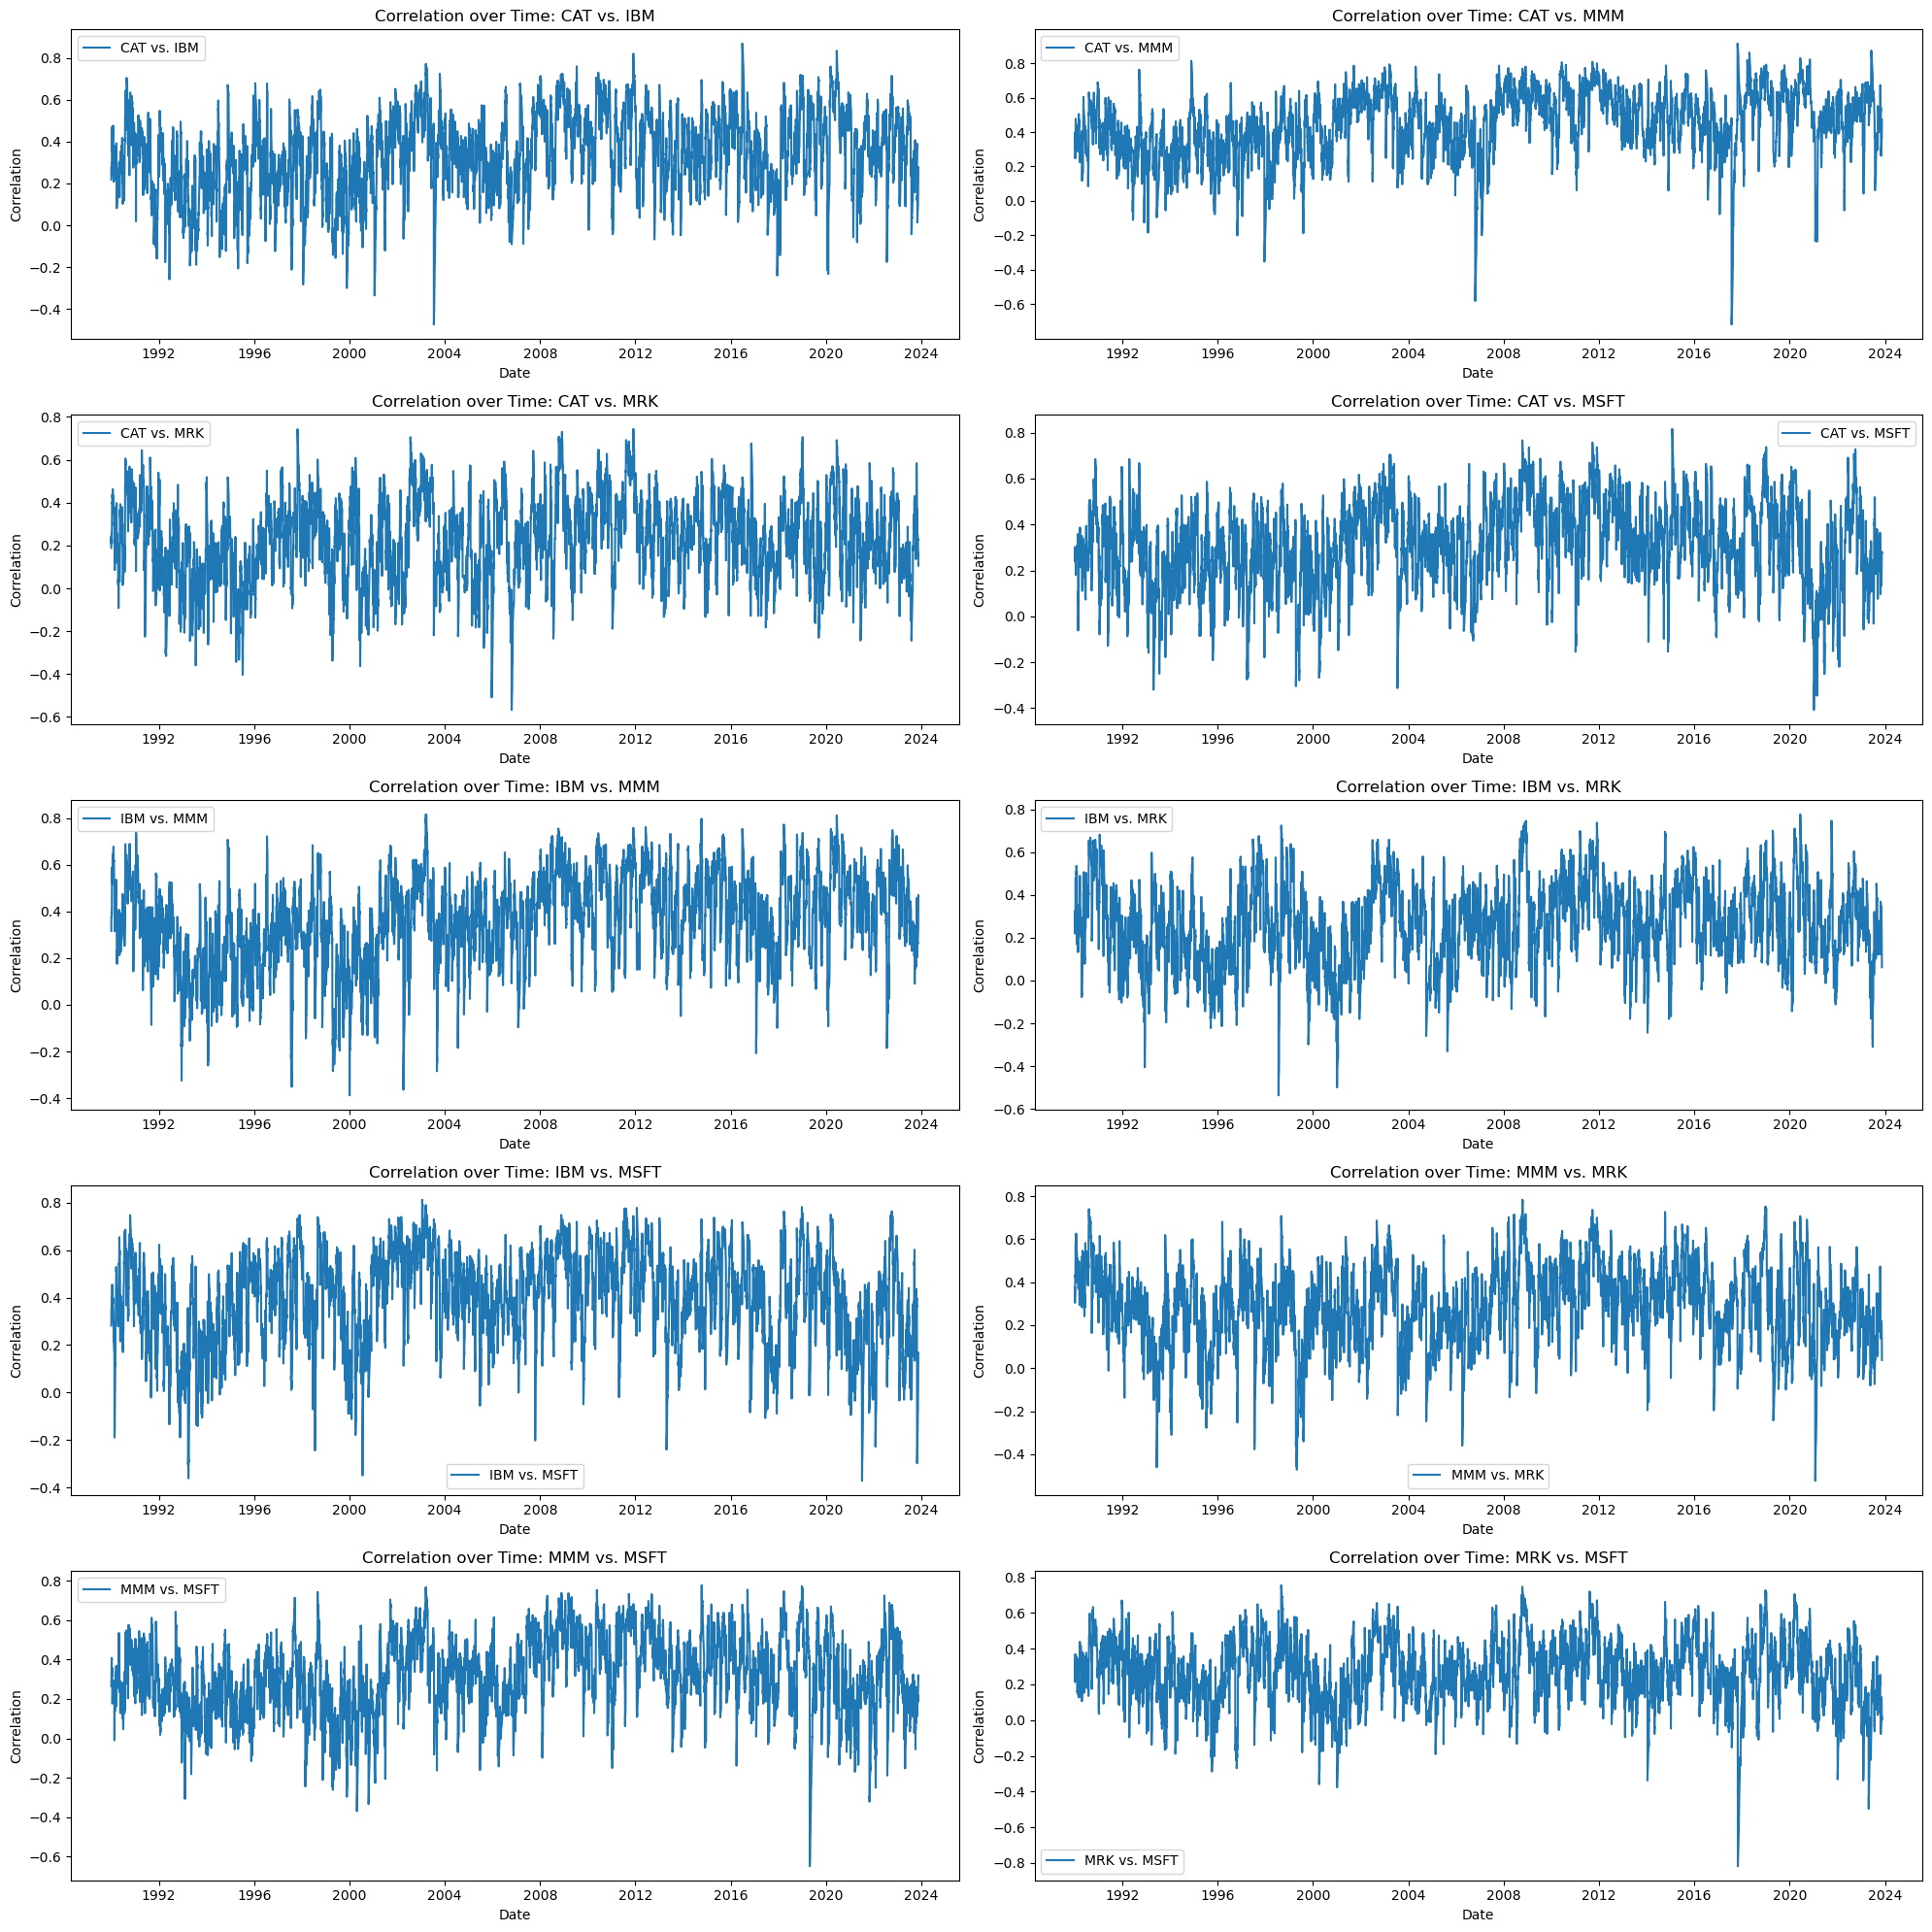

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for ax, ((asset_i, asset_j), correlations) in zip(axes, correlation_time_series.items()):
    ax.plot(standardized_residuals_df.index, correlations, label=f'{asset_i} vs. {asset_j}')
    ax.set_title(f'Correlation over Time: {asset_i} vs. {asset_j}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Correlation')
    ax.legend()

plt.tight_layout()
plt.show()

#

# On asset level

In [18]:
def plot_correlations_for_asset(asset, standardized_residuals_df, correlation_time_series, color='blue'):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 10))
    axes = axes.flatten()
    
    other_assets = [a for a in standardized_residuals_df.columns if a != asset]
    for i, other_asset in enumerate(other_assets[:4]):
        key = tuple(sorted([asset, other_asset]))
        correlations = correlation_time_series.get(key, None)
        if correlations is not None:
            axes[i].plot(standardized_residuals_df.index, correlations, color=color)
            axes[i].set_title(f'{asset} vs. {other_asset}')
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('Correlation')
            axes[i].legend([f'{asset} vs. {other_asset}'])
        else:
            axes[i].text(0.5, 0.5, f'No correlation data for {asset} vs. {other_asset}', 
                         horizontalalignment='center', verticalalignment='center', 
                         transform=axes[i].transAxes)
    
    plt.tight_layout()
    plt.show()

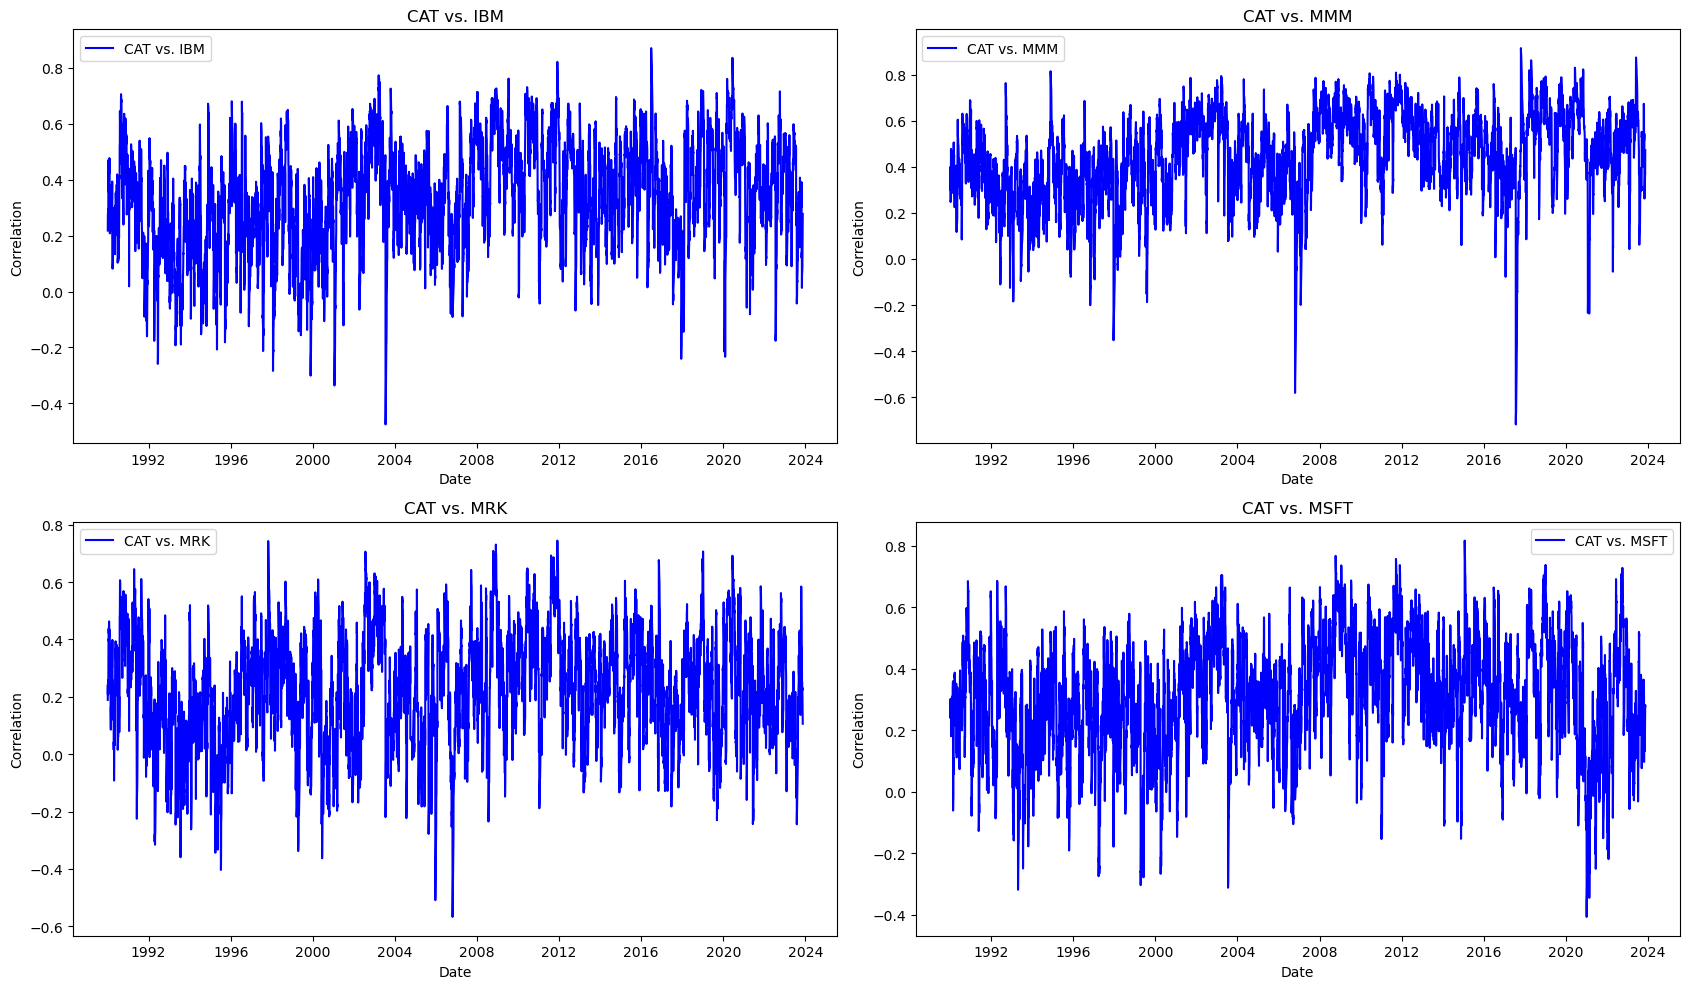

In [19]:
plot_correlations_for_asset('CAT', standardized_residuals_df, correlation_time_series, color='Blue')

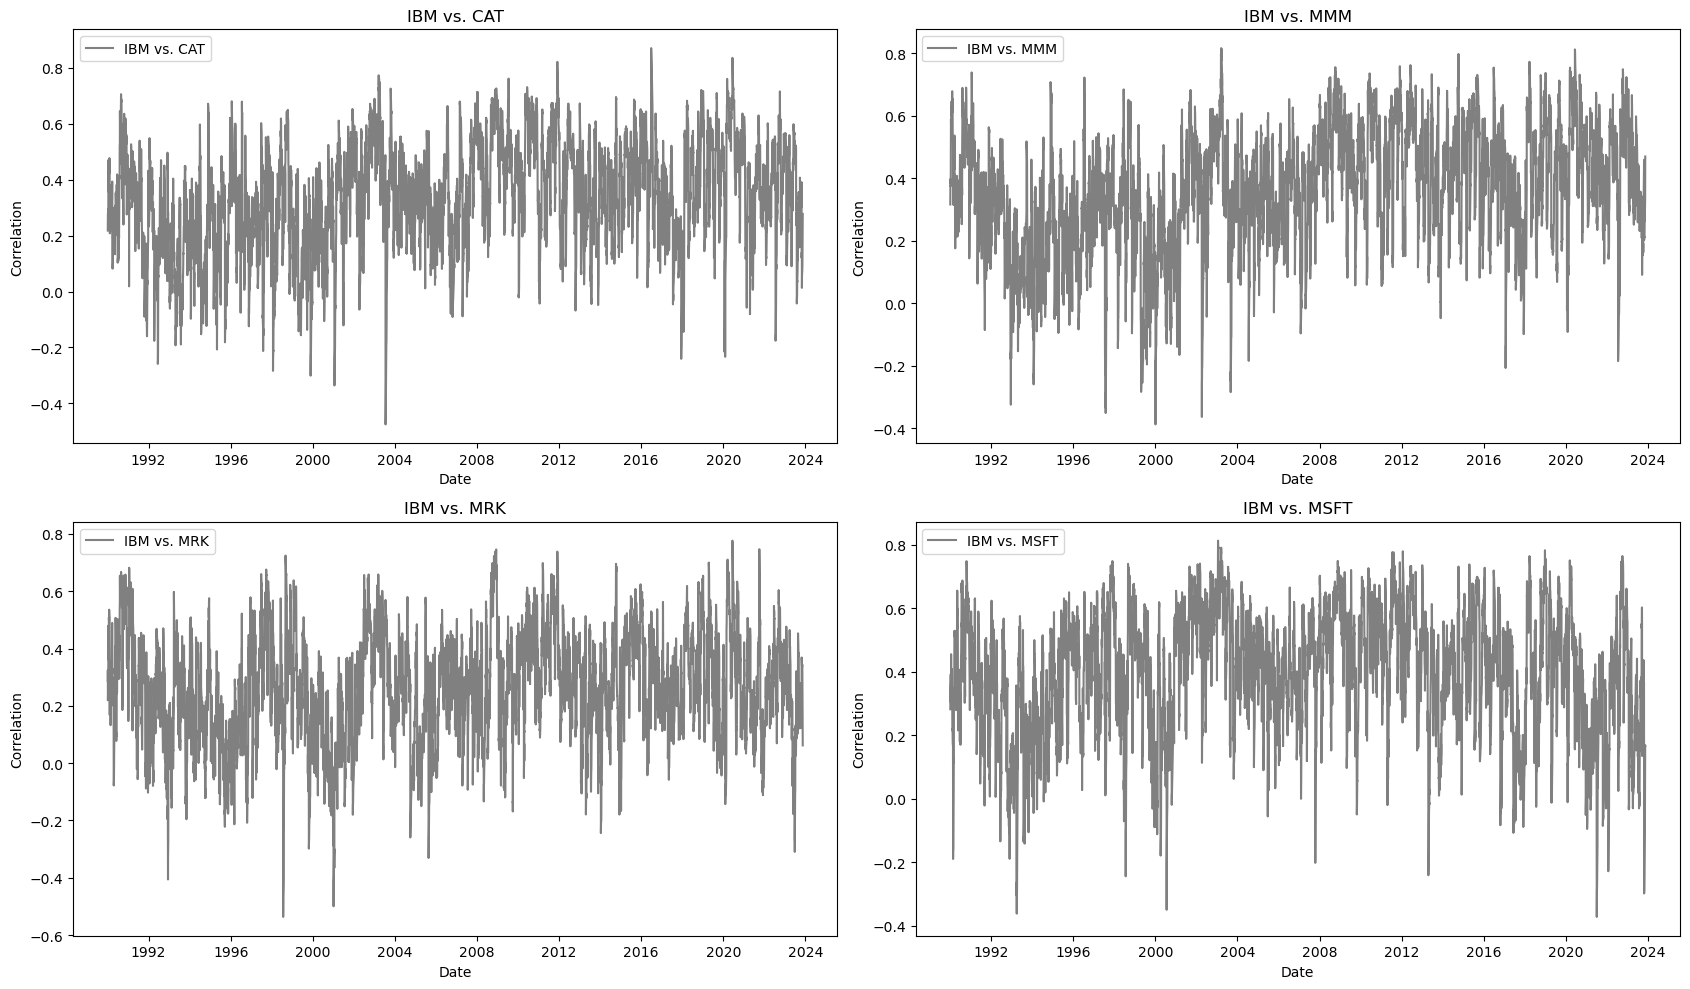

In [20]:
plot_correlations_for_asset('IBM', standardized_residuals_df, correlation_time_series, color='grey')

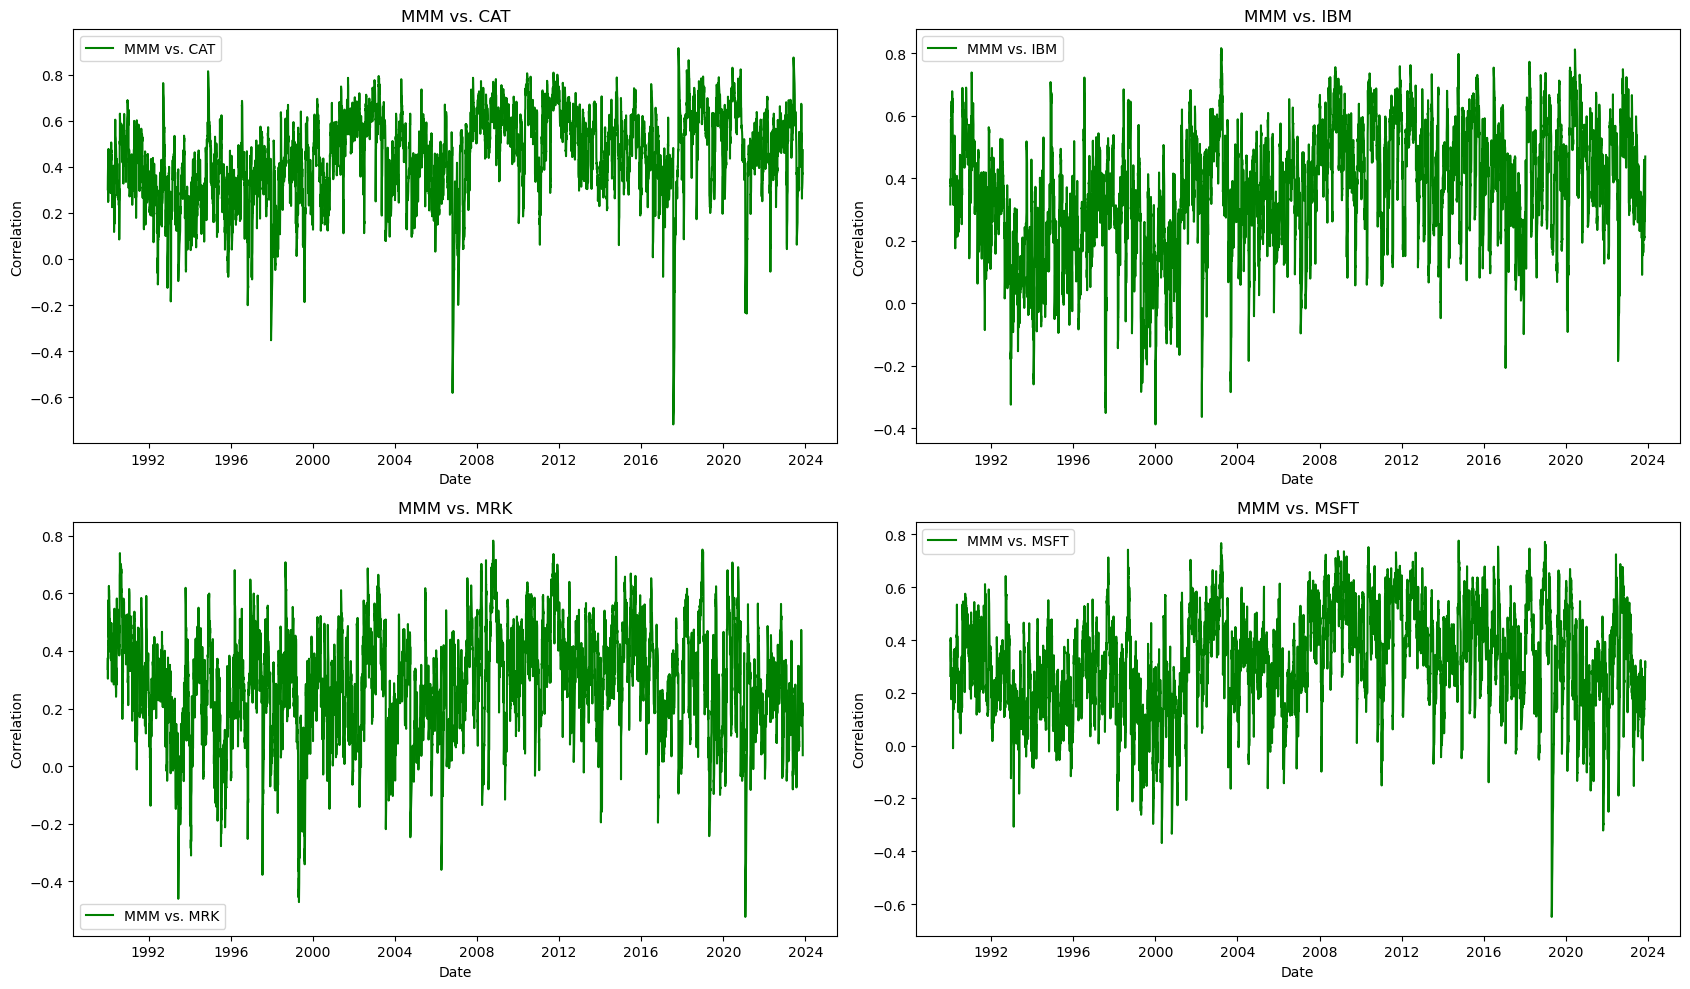

In [21]:
plot_correlations_for_asset('MMM', standardized_residuals_df, correlation_time_series, color='green')

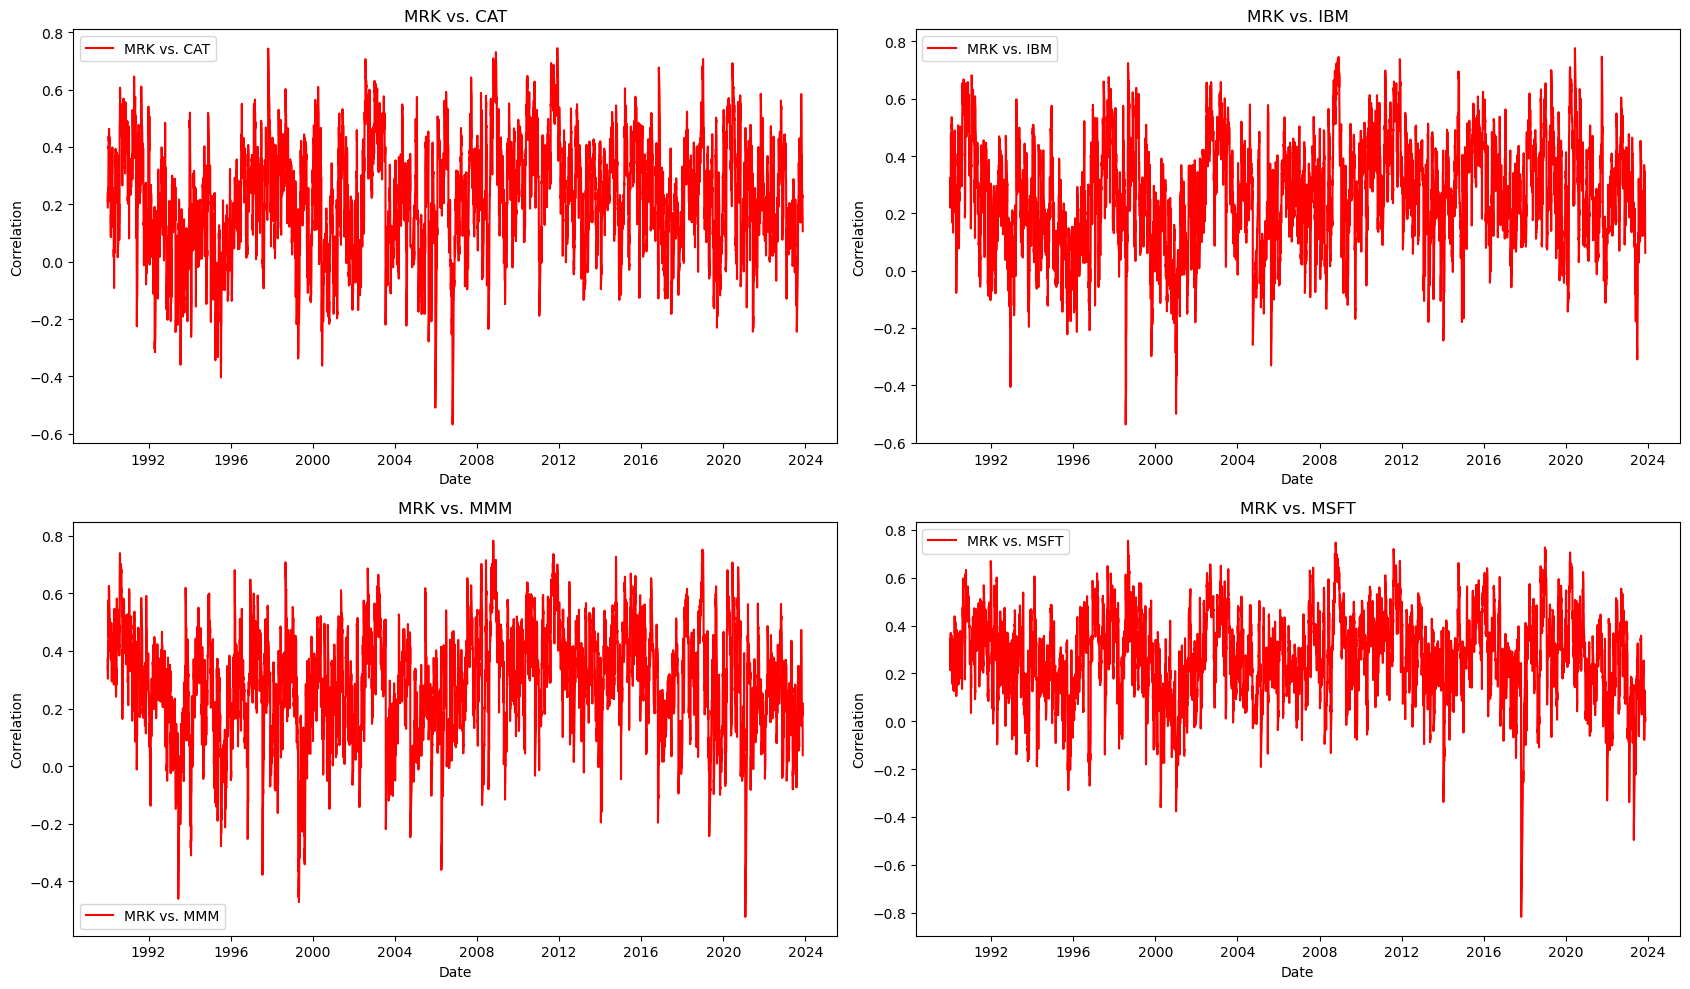

In [22]:
plot_correlations_for_asset('MRK', standardized_residuals_df, correlation_time_series, color='red')

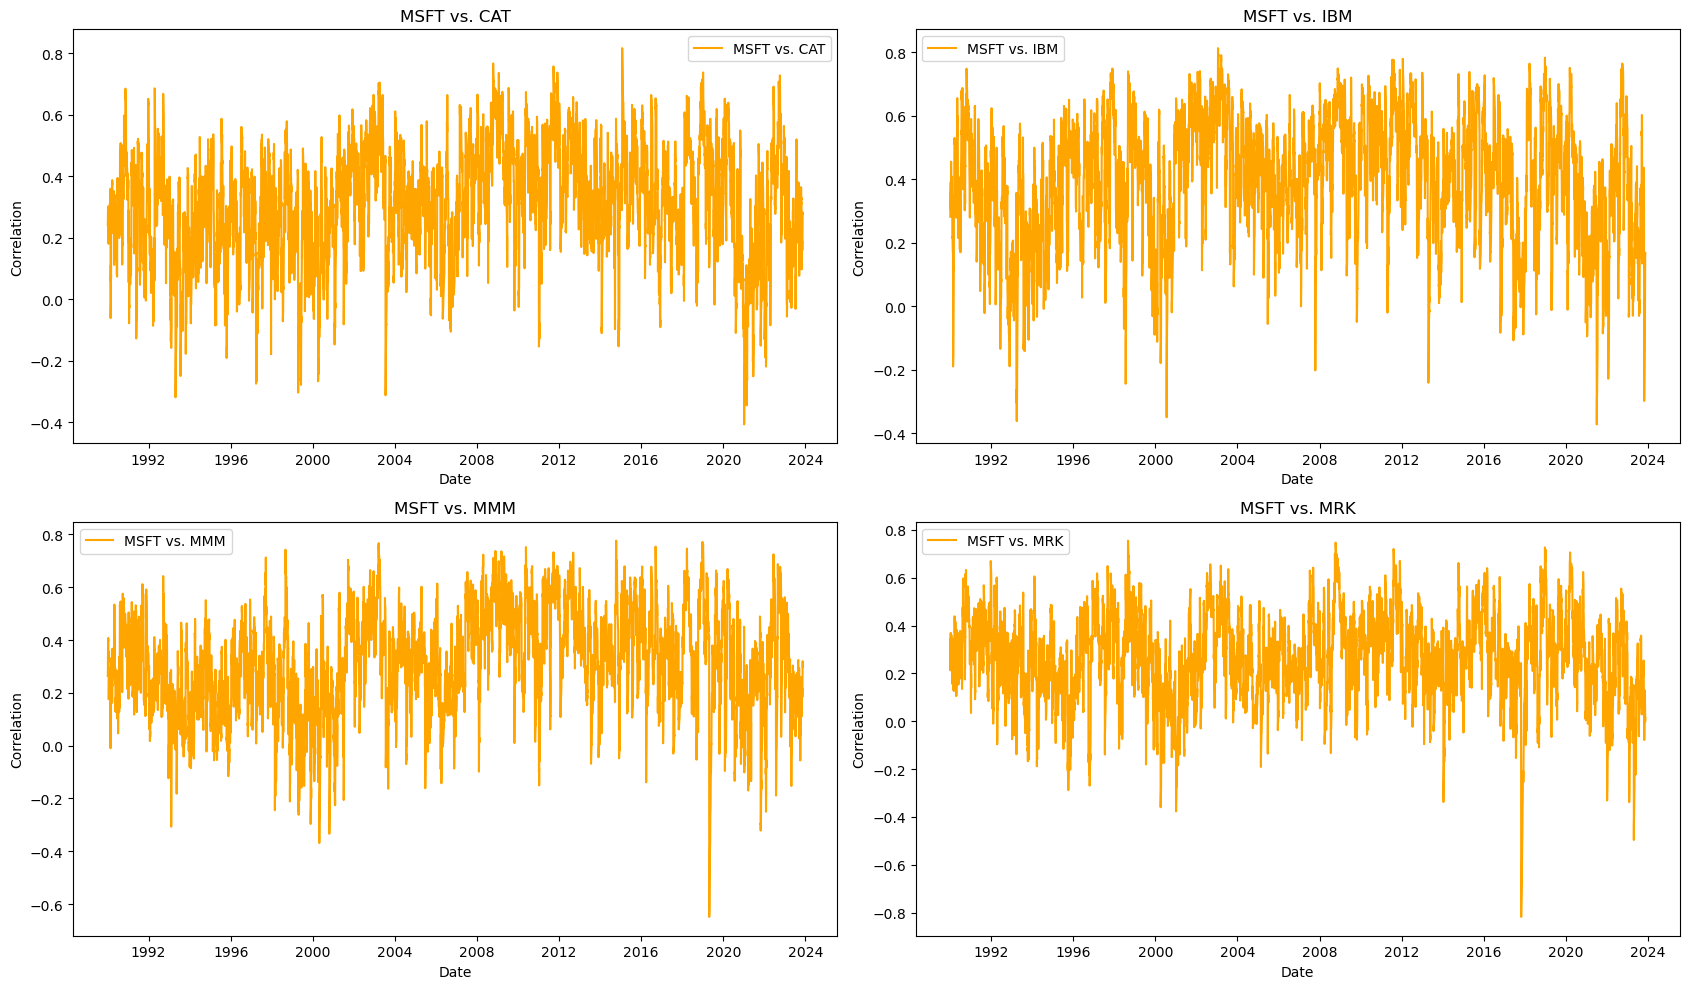

In [23]:
plot_correlations_for_asset('MSFT', standardized_residuals_df, correlation_time_series, color='orange')

#

# On asset level (trendline)

In [24]:
def plot_smoothed_correlations(asset, standardized_residuals_df, correlation_time_series, color='blue'):
    window_size = 252

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    other_assets = [a for a in standardized_residuals_df.columns if a != asset]
    for i, other_asset in enumerate(other_assets[:4]):
        ax = axes[i]
        key = tuple(sorted([asset, other_asset]))
        if key in correlation_time_series:
            correlations = pd.Series(correlation_time_series[key])
            smoothed = correlations.rolling(window=window_size, min_periods=1).mean()
            ax.plot(standardized_residuals_df.index, smoothed, label='Smoothed', color=color)
            ax.plot(standardized_residuals_df.index, correlations, label='Original', alpha=0.5, color='grey')
            ax.set_title(f'Smoothed Correlation: {asset} vs. {other_asset}')
            ax.set_xlabel('Date')
            ax.set_ylabel('Correlation')
            ax.legend()

    plt.tight_layout()
    plt.show()

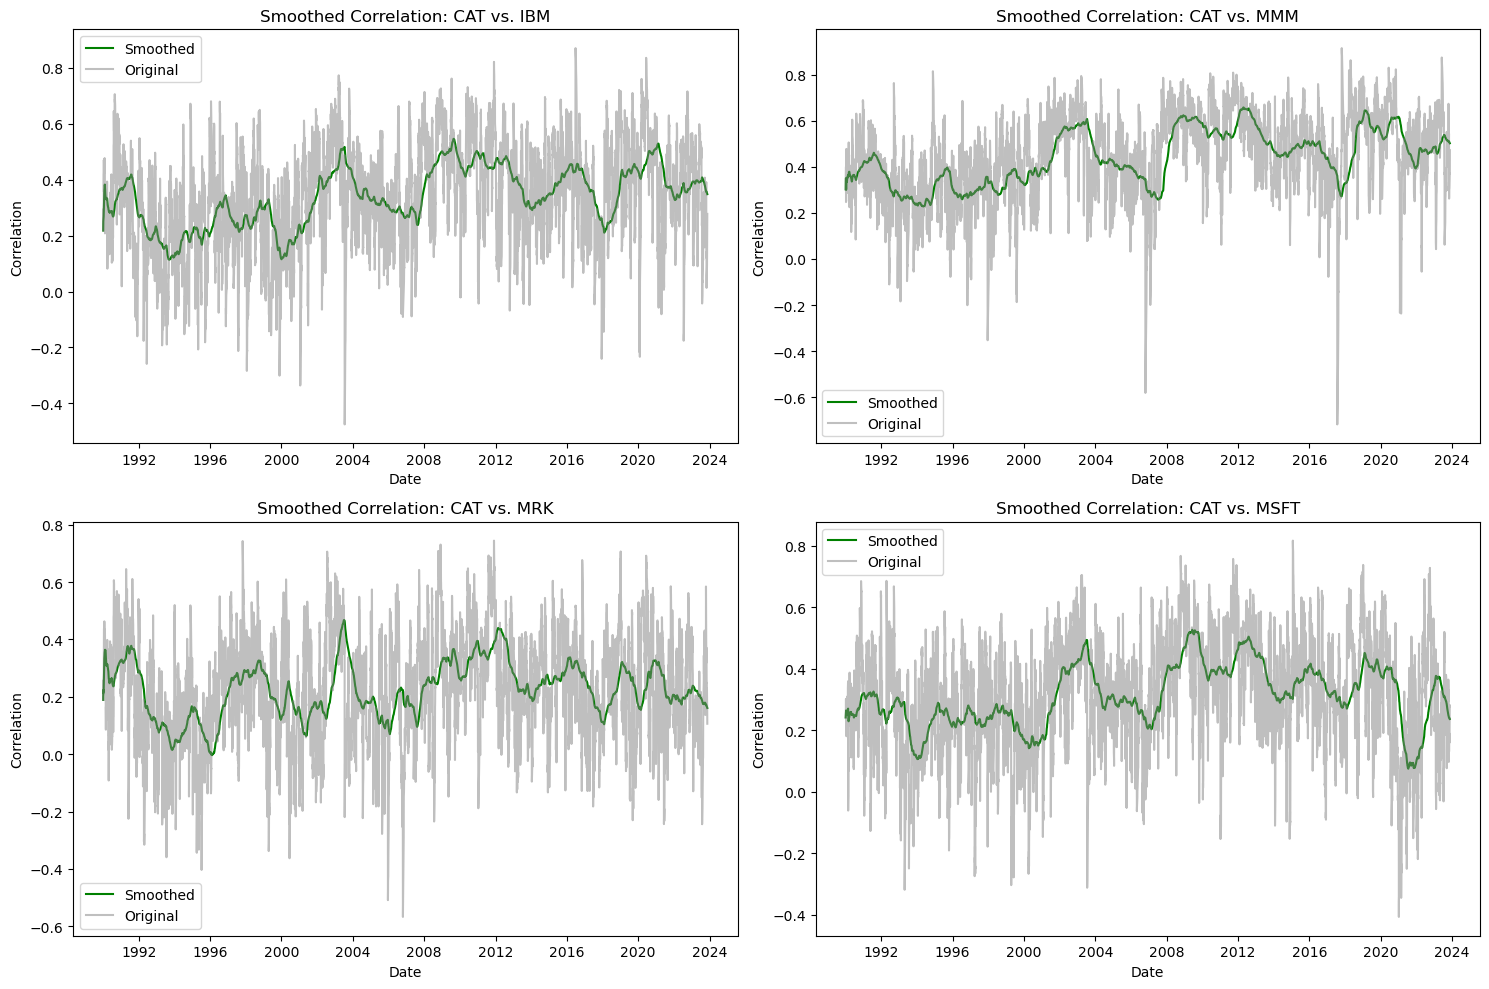

In [25]:
plot_smoothed_correlations('CAT', standardized_residuals_df, correlation_time_series, color='green')

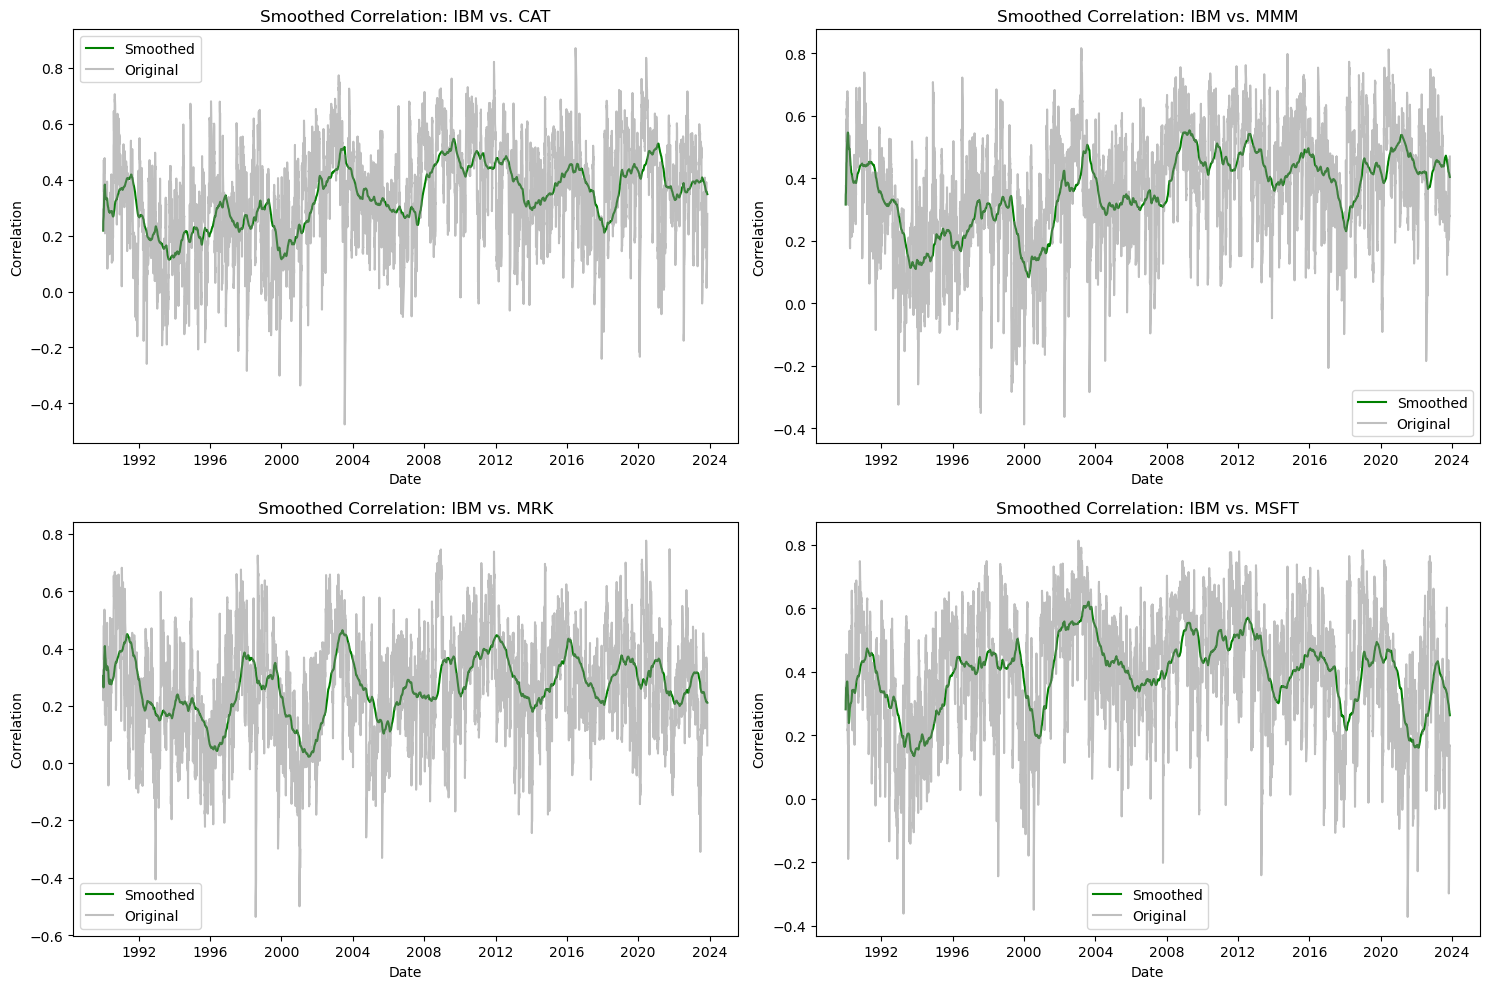

In [26]:
plot_smoothed_correlations('IBM', standardized_residuals_df, correlation_time_series, color='green')

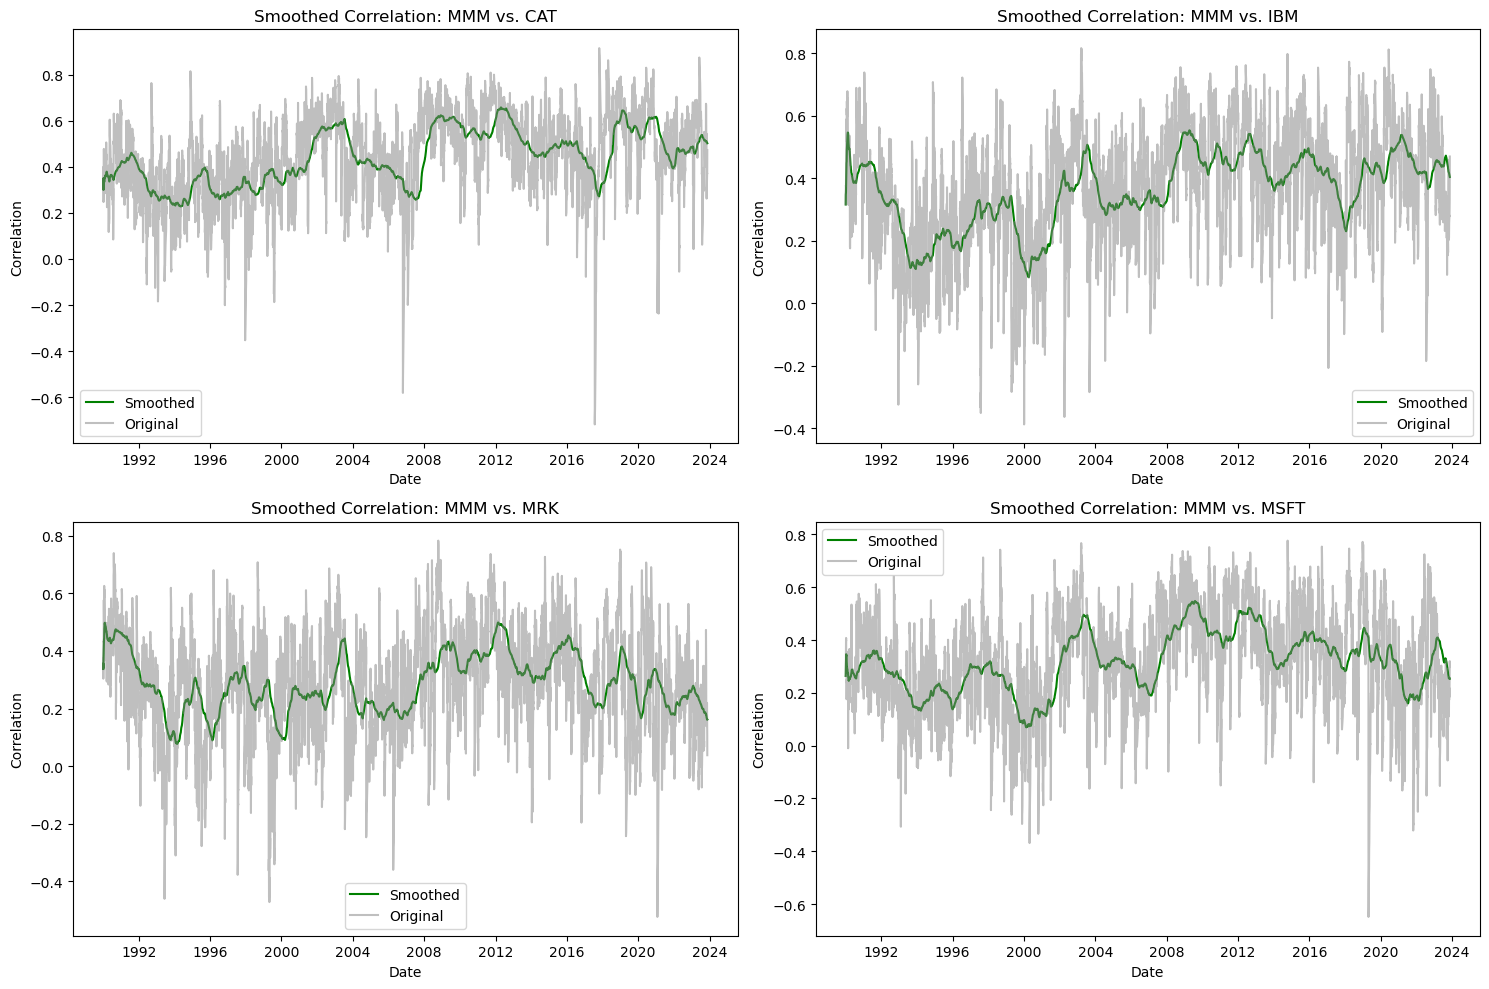

In [27]:
plot_smoothed_correlations('MMM', standardized_residuals_df, correlation_time_series, color='green')

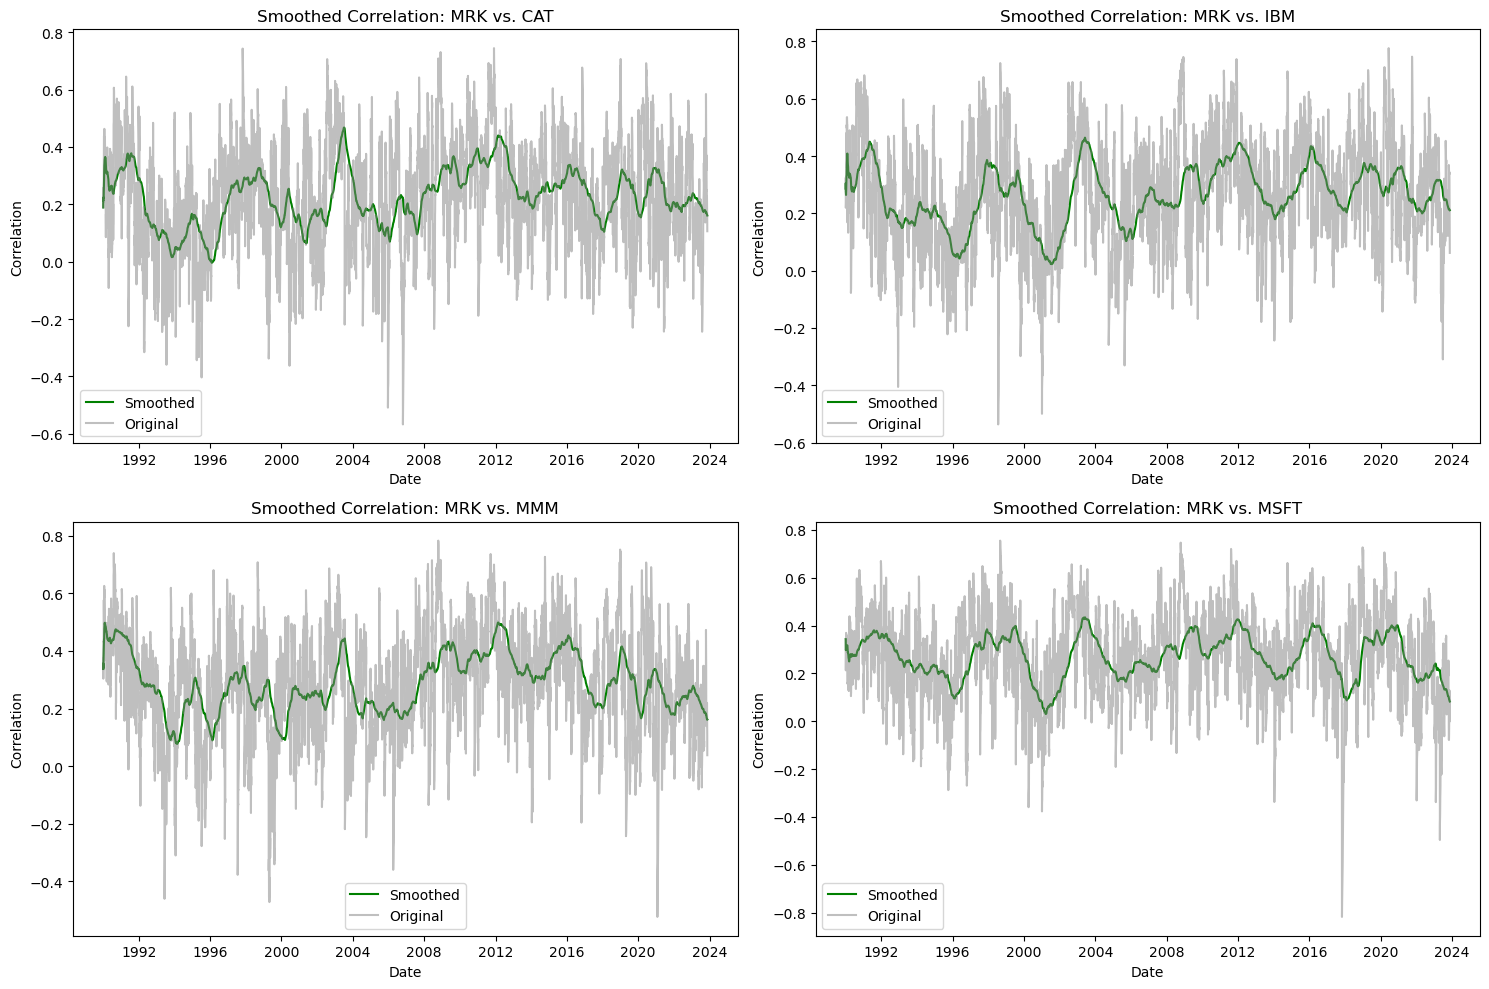

In [28]:
plot_smoothed_correlations('MRK', standardized_residuals_df, correlation_time_series, color='green')

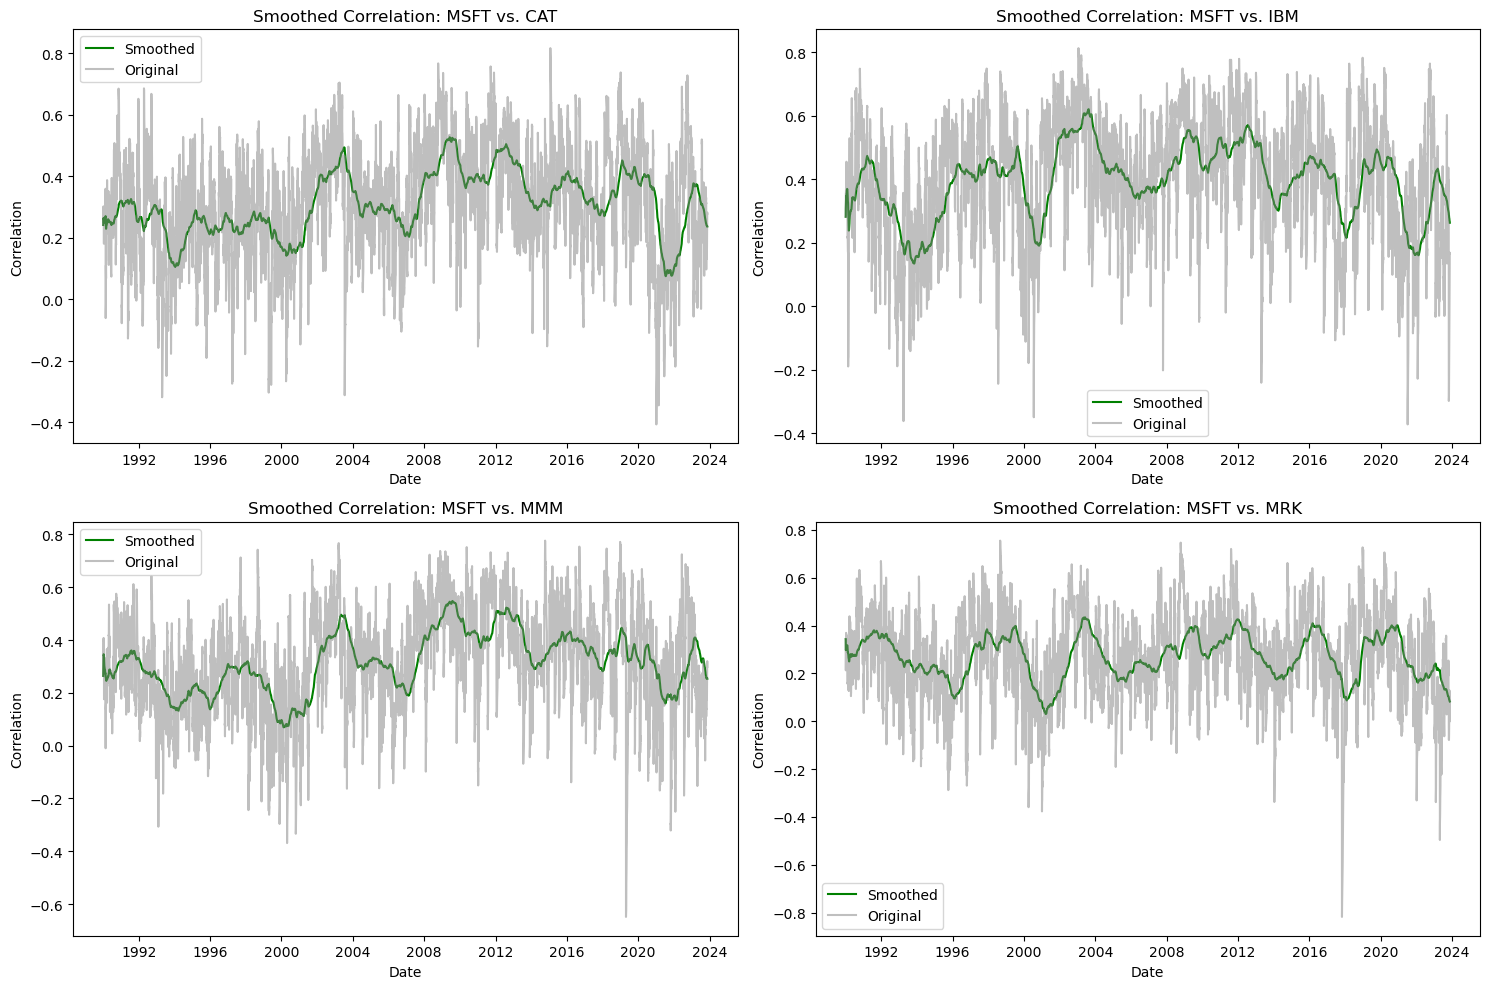

In [29]:
plot_smoothed_correlations('MSFT', standardized_residuals_df, correlation_time_series, color='green')